In [113]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# import plotly.express as px
import os
import time
IMAGES_FOLDER_PATH = "../images"

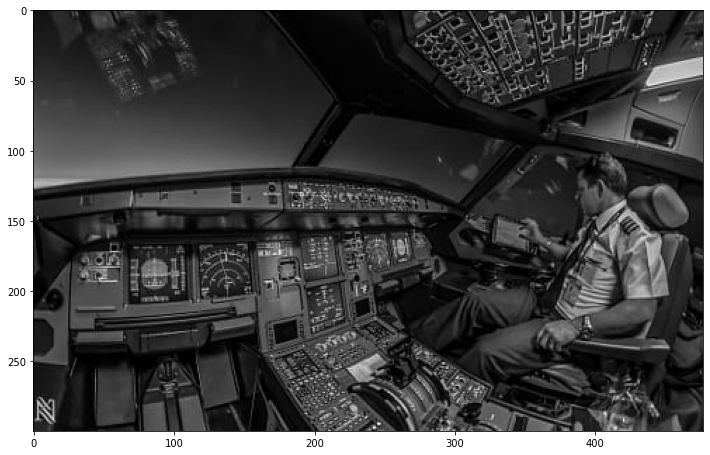

In [114]:
img = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'airplane.jpg'),0)

plt.figure(figsize=(12,10))
plt.imshow(img,cmap='gray')
plt.show()

## Part 1

In [115]:
def rotate(img,alpha,retain = True):
    h,w = img.shape
    
    alpha = np.radians(alpha)

    h, w = img.shape
    cy, cx = h / 2, w / 2

    a = np.round(np.math.cos(alpha),2)
    b = np.round(np.math.sin(alpha),2)
    xc1 = -cx
    xc2 = cx
    yc1 = -cy
    yc2 = cy

    rot_matrix = np.array([
    [   
        a, -b, xc1 * a - yc1 * b + xc2],[ b, a, xc1 * b + yc1 * a + yc2],[0,0,1]
    ])
    
    rot_matrix_inv = np.linalg.inv(rot_matrix)
    output = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            y,x,_ = np.dot(rot_matrix_inv,np.array([[j],[i],[1]]))
            x = int(np.rint(x[0]))
            y = int(np.rint(y[0]))
            if x>=0 and x<h and y>=0 and y<w:
                output[i,j] = img[x,y]

    if not retain:
        new_h_min = 100000000000000
        new_w_min = 100000000000000
        new_h_max = -100000000000000
        new_w_max = -100000000000000
        for i in range(h):
            for j in range(w):
                rotate_pts = rot_matrix @ np.array([[j],[i],[1]])
                new_h_min = min(new_h_min,int(rotate_pts[1]))  
                new_w_min = min(new_w_min,int(rotate_pts[0]))  
                new_h_max = max(new_h_max,int(rotate_pts[1]))  
                new_w_max = max(new_w_max,int(rotate_pts[0]))   

        new_h = new_h_max - new_h_min
        new_w = new_w_max - new_w_min

        rot_matrix2 = np.array([
        [   
            a, -b, xc1 * a - yc1 * b + new_w/2],[ b, a, xc1 * b + yc1 * a + new_h/2],[0,0,1]
        ])

        new_h_min = 100000000000000
        new_w_min = 100000000000000
        new_h_max = -100000000000000
        new_w_max = -100000000000000
        for i in range(h):
            for j in range(w):
                rotate_pts = rot_matrix2 @ np.array([[j],[i],[1]])
                new_h_min = min(new_h_min,int(rotate_pts[1]))  
                new_w_min = min(new_w_min,int(rotate_pts[0]))  
                new_h_max = max(new_h_max,int(rotate_pts[1]))  
                new_w_max = max(new_w_max,int(rotate_pts[0]))   

        new_h = new_h_max - new_h_min
        new_w = new_w_max - new_w_min

        output = np.zeros((new_h,new_w))

        rot_matrix2_inv = np.linalg.inv(rot_matrix2)


        for i in range(new_h):
            for j in range(new_w):
                y,x,_ = np.dot(rot_matrix2_inv,np.array([[j],[i],[1]]))
                x = int(np.rint(x[0]))
                y = int(np.rint(y[0]))
                if x>=0 and x<h and y>=0 and y<w:
                    output[i,j] = img[x,y]

    return output

## Part 2

In [120]:
output_crop = rotate(img,30,retain = True)
output = rotate(img,30,retain = False)

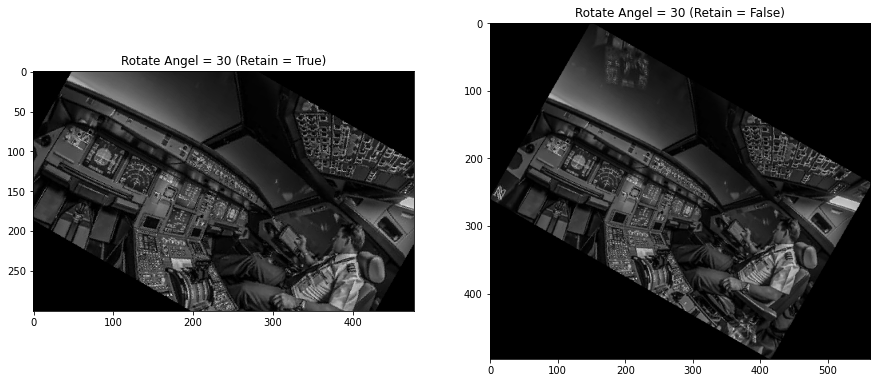

In [121]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(output_crop,cmap='gray')
plt.title("Rotate Angel = 30 (Retain = True)")
plt.subplot(122)
plt.imshow(output,cmap='gray')
plt.title("Rotate Angel = 30 (Retain = False)")
plt.show()

In [122]:
output_crop = rotate(img,45,retain = True)
output = rotate(img,45,retain = False)

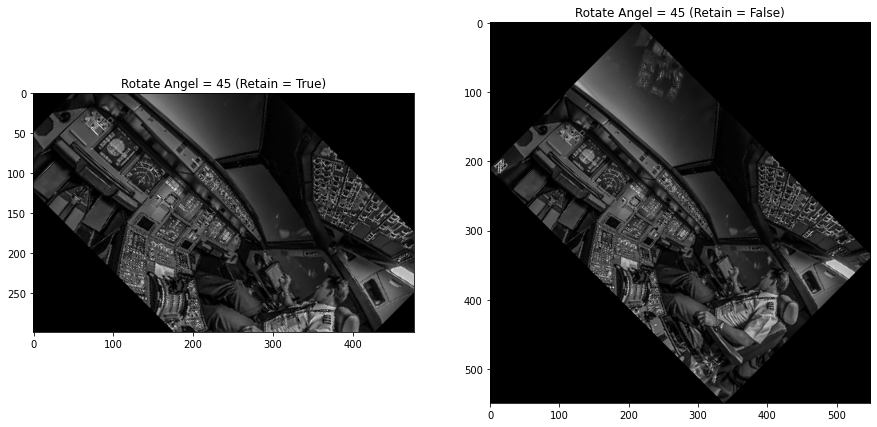

In [123]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(output_crop,cmap='gray')
plt.title("Rotate Angel = 45 (Retain = True)")
plt.subplot(122)
plt.imshow(output,cmap='gray')
plt.title("Rotate Angel = 45 (Retain = False)")
plt.show()

In [124]:
output_crop = rotate(img,90,retain = True)
output = rotate(img,90,retain = False)

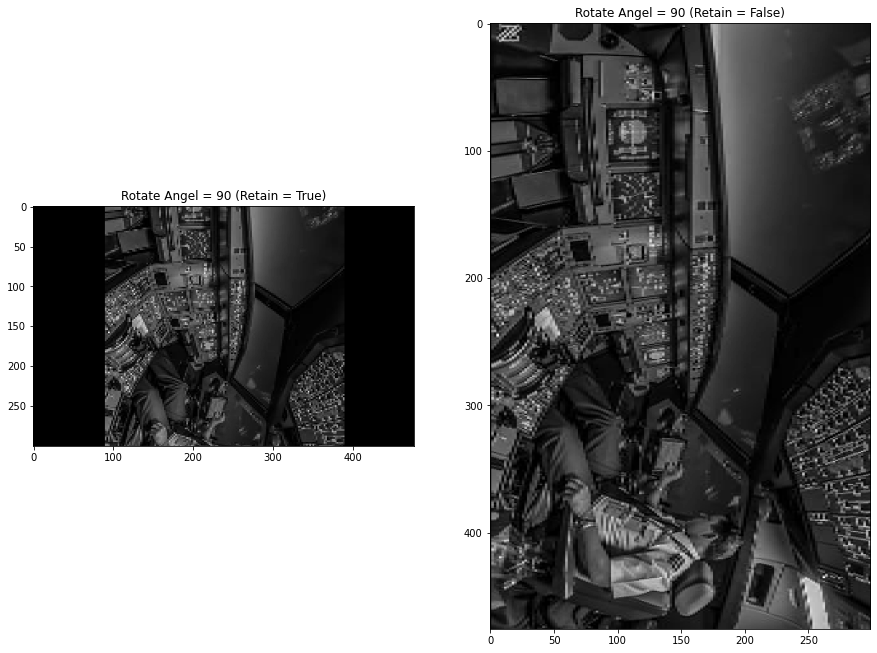

In [125]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(output_crop,cmap='gray')
plt.title("Rotate Angel = 90 (Retain = True)")
plt.subplot(122)
plt.imshow(output,cmap='gray')
plt.title("Rotate Angel = 90 (Retain = False)")
plt.show()

In [126]:
output_crop = rotate(img,-30,retain = True)
output = rotate(img,-30,retain = False)

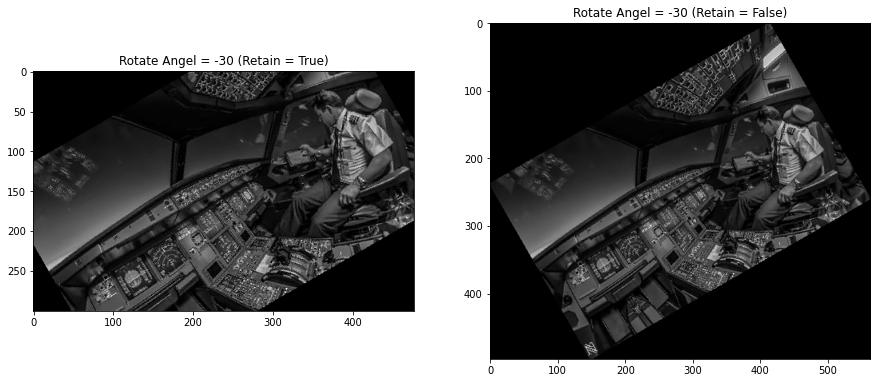

In [128]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(output_crop,cmap='gray')
plt.title("Rotate Angel = -30 (Retain = True)")
plt.subplot(122)
plt.imshow(output,cmap='gray')
plt.title("Rotate Angel = -30 (Retain = False)")
plt.show()

In [129]:
output_crop = rotate(img,-110,retain = True)
output = rotate(img,-110,retain = False)

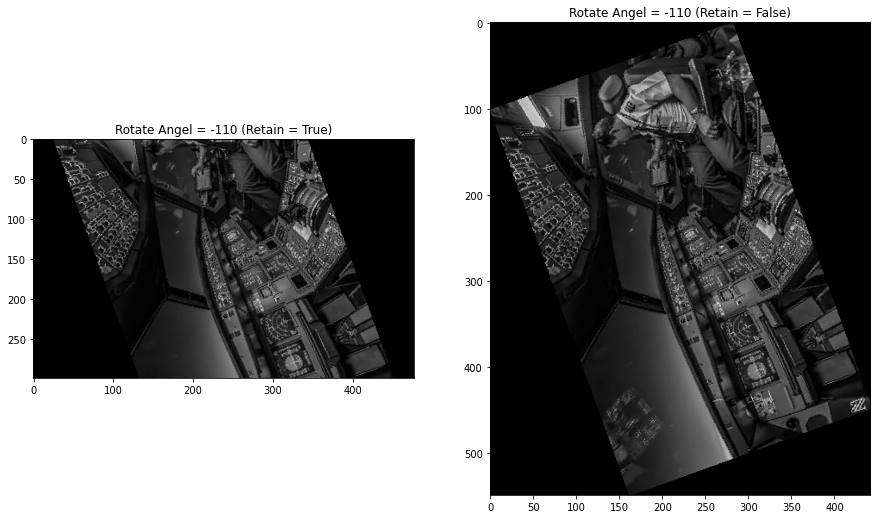

In [130]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(output_crop,cmap='gray')
plt.title("Rotate Angel = -110 (Retain = True)")
plt.subplot(122)
plt.imshow(output,cmap='gray')
plt.title("Rotate Angel = -110 (Retain = False)")
plt.show()